<a href="https://colab.research.google.com/github/weasel-codes/google-colab/blob/udemy-dl/Regularization_In_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regularization
* **Underfit**
  * If we built an algo that doesnt fit our training set very well, we end up with under fitting condition.
  * Underfitting results in High Variance as model is good at predicting new test data.
  * Underfitting result in low bias as our algo doesnt very well fit training set.
* **Overfit**
  * If our algo tries to satisfy all inputs, we end up with very high degree polynomial algo resulting in Overfitting.
  * Overfitting results in High Bias as our model tightly tries to satisfy training data.
  * Overfitting results in low variance as our algo is prone to wrong/false prediction in case test data are not of the same type as that of training data.
* Through **regularization** we aim at finding the sweet spot btw underfitting and overfitting without loosing any important feature and reducing the test error.

## Types of Regularization

### Early Stopping
* Early stopping is a kind of cross-validation strategy where we keep one part of the training set as the validation set. 
* When we see that the performance on the validation set is getting worse, we immediately stop the training on the model. This is known as **Early stopping**.

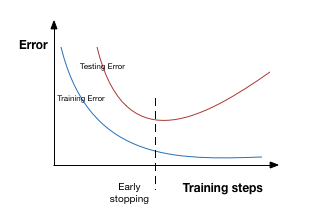

* In the above image, we will stop training at the dotted line since after that our model will start overfitting on the training data.

### Dropout Regularization